In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string 

# cleaning

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.rename(columns={'v1':'target','v2':"sms"},inplace=True)

In [8]:
df.sample(5)

,target,sms
5439,ham,Hey i've booked the 2 lessons on sun liao...
1909,ham,Then u going ikea str aft dat?
688,ham,Thanks love. But am i doing torch or bold.
3032,ham,"Aight, lemme know what's up"
4154,spam,Want a new Video Phone? 750 anytime any networ...


In [9]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.duplicated().sum()

np.int64(403)

In [11]:
df.drop_duplicates(keep='first',inplace=True)

# 2. EDA

In [12]:
df['target'].value_counts() # data is imbalanced

target
0    4516
1     653
Name: count, dtype: int64

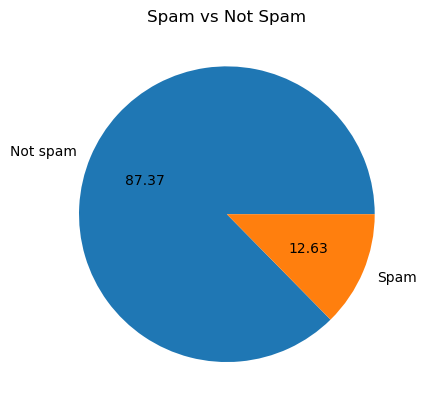

In [13]:
plt.pie(df['target'].value_counts(),labels=['Not spam','Spam'],autopct='%0.2f')
plt.title('Spam vs Not Spam')
plt.show()

In [14]:
nltk.download('punkt') # downloading dependenci for nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\khani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
df['characters'] = df['sms'].apply(len) # numbers of characters in each sms

In [17]:
df['words'] = df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [18]:
df['sentences'] = df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,sms,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.iloc[:,2:].groupby(df['target']).describe().stack(0)

C:\Users\khani\AppData\Local\Temp\ipykernel_28548\2456285868.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.iloc[:,2:].groupby(df['target']).describe().stack(0)


count        mean        std   min    25%    50%    75%  \
target                                                                        
0      characters  4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0   
       sentences   4516.0    1.820195   1.383657   1.0    1.0    1.0    2.0   
       words       4516.0   17.123782  13.493970   1.0    8.0   13.0   22.0   
1      characters   653.0  137.891271  30.137753  13.0  132.0  149.0  157.0   
       sentences    653.0    2.970904   1.488425   1.0    2.0    3.0    4.0   
       words        653.0   27.667688   7.008418   2.0   25.0   29.0   32.0   

                     max  
target                    
0      characters  910.0  
       sentences    38.0  
       words       220.0  
1      characters  224.0  
       sentences     9.0  
       words        46.0

<Axes: xlabel='characters', ylabel='Count'>

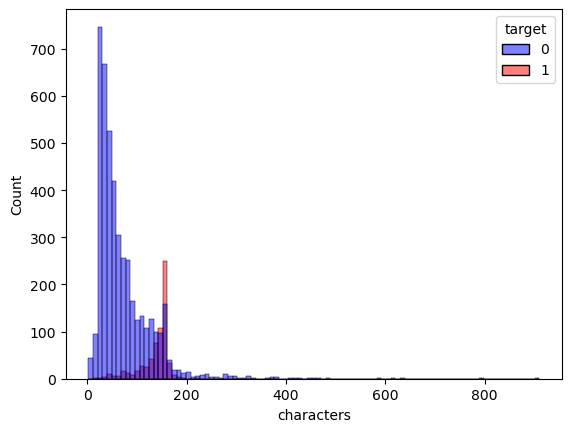

In [21]:
sns.histplot(df,x='characters',hue='target',palette=['blue','red'])

<Axes: xlabel='words', ylabel='Count'>

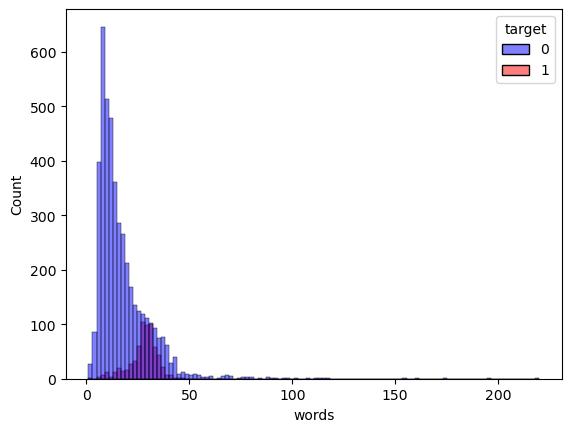

In [22]:
sns.histplot(df,x='words',hue='target',palette=['blue','red'])

<Axes: xlabel='sentences', ylabel='Count'>

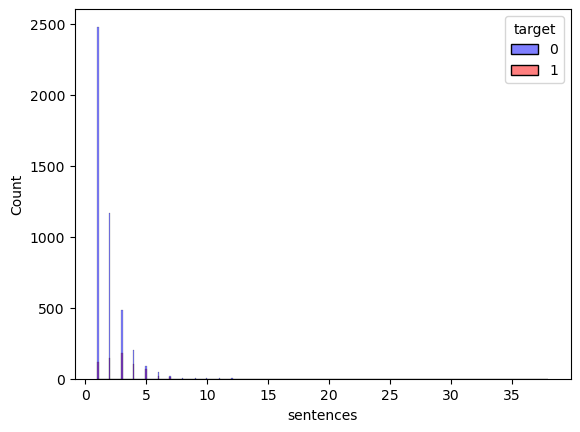

In [23]:
sns.histplot(df,x='sentences',hue='target',palette=['blue','red'])

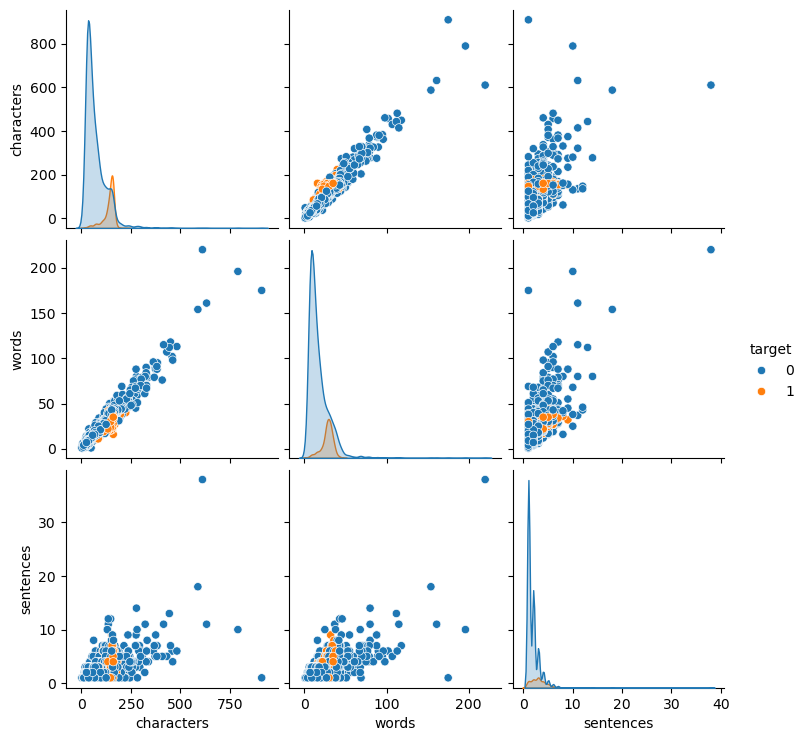

In [24]:
sns.pairplot(df,hue='target')

<Axes: >

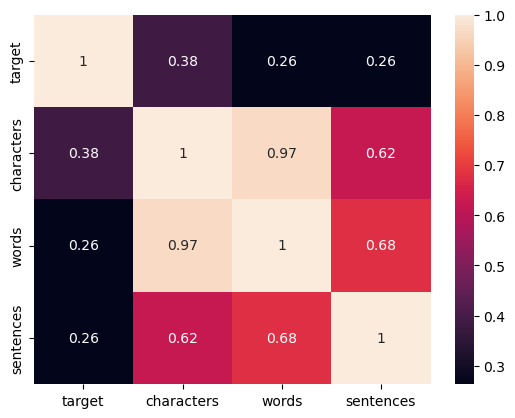

In [25]:
sns.heatmap(df.corr(numeric_only=True),annot=True) #multicolinerity exist
# so we will keep only one column from the 3
# why characters --> high correlation with target

# 3 preprocessing

> to lower 

>tokenizer

>removing stop words, punctuations and special char

>stemming


In [26]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [27]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i.isalnum() and i  not in stopwords.words('english'):
            y.append(stemmer.stem(i))

    return " ".join(y)
    
transform_text('Hi Hello How ARE you ? :> do You like Dancing <3')

'hi hello like danc 3'

In [28]:
df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [29]:
transform_text(df['sms'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [30]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
df['transformed_text'] = df['sms'].apply(transform_text)

In [33]:
df

,target,sms,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# 4 analyzing words

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=750,height=750,min_font_size=10,background_color='white')

In [ ]:
# df[df['target']==1]['transformed_text'].str.cat(sep=' ')

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

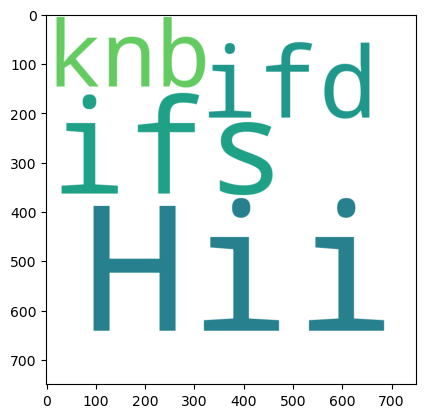

In [36]:
plt.imshow(wc.generate('Hii hii Hii Hii ifd knb ifs ifs he'))

In [37]:
cloud_spam = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

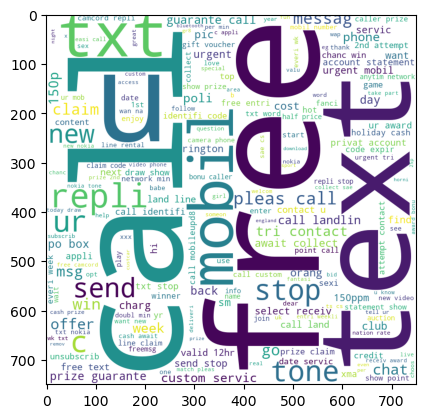

In [38]:
plt.imshow(cloud_spam)

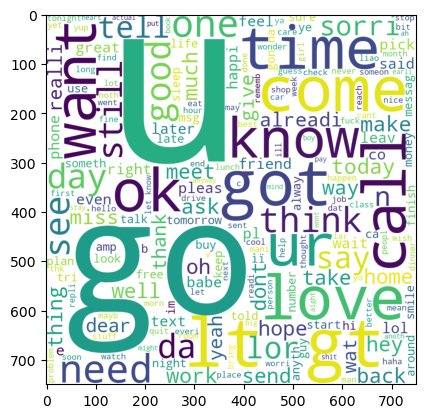

In [39]:
cloud_ham = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(cloud_ham)

### top 30 words

In [40]:
spam_sms = df[df['target']==1]['transformed_text'].to_list()
spam_corpus = []
for i in spam_sms:
    for word in i.split():
        spam_corpus.append(word)

In [41]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [42]:
from collections import Counter

In [43]:
common30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
common30

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\khani\AppData\Local\Temp\ipykernel_28548\3513412908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common30[0] , y=common30[1],palette='viridis')


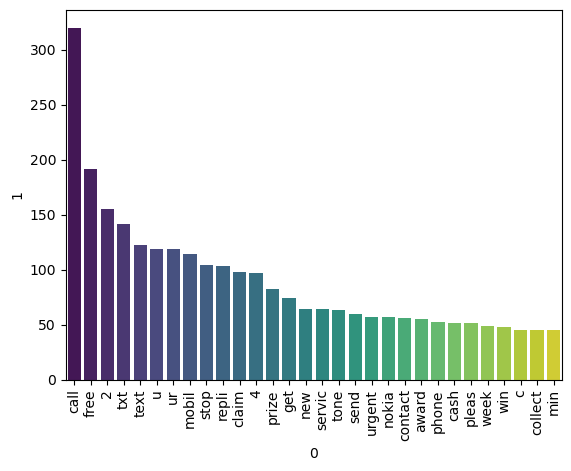

In [44]:
sns.barplot(x=common30[0] , y=common30[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_sms = df[df['target']==0]['transformed_text'].to_list()
ham_corpus = []
for i in ham_sms:
    for word in i.split():
        ham_corpus.append(word)

In [46]:
ham_common30 = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_common30

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\khani\AppData\Local\Temp\ipykernel_28548\3671734892.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ham_common30[0] , y=ham_common30[1],palette='viridis')


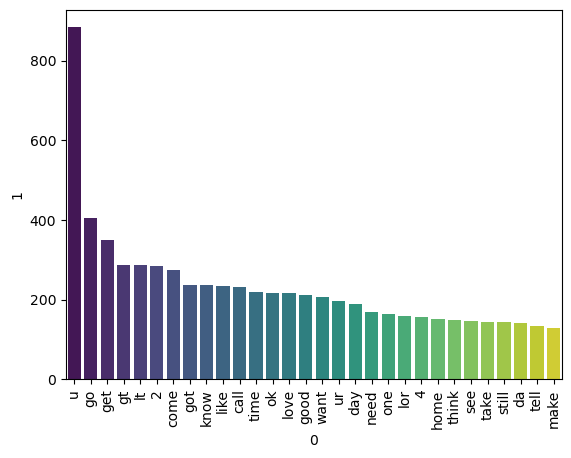

In [47]:
sns.barplot(x=ham_common30[0] , y=ham_common30[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

# 5 Model Building

In [88]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

<b> CountVectorizer </b> --> bag of word algo i.e Creates a matrix of word counts (frequency) for each document. <br>
<b> tfidfVectorizer </b> --> Weighs word counts by their rarity across the entire document collection (corpus)

In [49]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [50]:
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5169, 6708)


In [51]:
y = df['target']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_test,gnb_pred))
print(precision_score(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))

0.8684719535783365
0.5060240963855421
[[772 123]
 [ 13 126]]


In [56]:
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print(accuracy_score(y_test,mnb_pred))
print(precision_score(y_test,mnb_pred))
print(confusion_matrix(y_test,mnb_pred))

0.9796905222437138
0.9214285714285714
[[884  11]
 [ 10 129]]


In [57]:
bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)
print(accuracy_score(y_test,bnb_pred))
print(precision_score(y_test,bnb_pred))
print(confusion_matrix(y_test,bnb_pred))

0.9613152804642167
0.9380530973451328
[[888   7]
 [ 33 106]]


### using tfidf

In [89]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [90]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y,test_size=0.2,random_state=3)

In [91]:
gnb.fit(X2_train,y2_train)
gnb_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,gnb_pred2))
print(precision_score(y2_test,gnb_pred2))
print(confusion_matrix(y2_test,gnb_pred2))

0.8617021276595744
0.49382716049382713
[[771 123]
 [ 20 120]]


In [92]:
mnb.fit(X2_train,y2_train)
mnb_pred2 = mnb.predict(X2_test)
print(accuracy_score(y2_test,mnb_pred2))
print(precision_score(y2_test,mnb_pred2))
print(confusion_matrix(y2_test,mnb_pred2))

0.9700193423597679
1.0
[[894   0]
 [ 31 109]]


In [93]:
bnb.fit(X2_train,y2_train)
bnb_pred2 = bnb.predict(X2_test)
print(accuracy_score(y2_test,bnb_pred2))
print(precision_score(y2_test,bnb_pred2))
print(confusion_matrix(y2_test,bnb_pred2))

0.9787234042553191
0.9916666666666667
[[893   1]
 [ 21 119]]


## decision

> go with mnb with tidf vectorizer --> bcz precision matters more in case of spam detection

# 6 Model Selection

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [72]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
bgc = BaggingClassifier(n_estimators=50,random_state=2)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimator=50,randon_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()

In [73]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
clfs = {
    "LR" : lr,
    "BGC" : bgc,
    "RFC" : rfc,
    "GBC" : gbc,
    "XGBS" : xgbc,
    "ABC" : abc,
    "ETC" : etc,
    "DTC" : dtc,
    "KNC" : knc,
    "SVC" : svc,
    "MNB" : mnb,
}

In [76]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [77]:
train_classifier(lr,X_train,X_test,y_train,y_test)

(0.9555125725338491, 0.96)

In [78]:
acc_scores = []
prec_scores = []

for i in clfs.items():
    accuracy,precision = train_classifier(i[1],X_train,X_test,y_train,y_test)
    acc_scores.append(accuracy)
    prec_scores.append(precision)

c:\Users\khani\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:10:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_estimator", "randon_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [79]:
clfs.items()

dict_items([('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('BGC', BaggingClassifier(n_estimators=50, random_state=2)), ('RFC', RandomForestClassifier(n_estimators=50, random_state=2)), ('GBC', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('XGBS', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=50,
              n_es

In [94]:
model_performances = pd.DataFrame({"name":clfs.keys(),"accuracy":acc_scores,"precision":prec_scores}).sort_values(by='precision',ascending=False)
model_performances

,name,accuracy,precision
10,MNB,0.970986,1.000000
8,KNC,0.905222,1.000000
2,RFC,0.973888,0.982609
9,SVC,0.975822,0.974790
6,ETC,0.974855,0.974576
0,LR,0.955513,0.960000
4,XGBS,0.974855,0.951613
3,GBC,0.950677,0.930693
1,BGC,0.958414,0.868217
7,DTC,0.930368,0.830000


In [81]:
model_performances_df1 = model_performances.melt(id_vars='name')
model_performances_df1

,name,variable,value
0,MNB,accuracy,0.970986
1,KNC,accuracy,0.905222
2,RFC,accuracy,0.973888
3,SVC,accuracy,0.975822
4,ETC,accuracy,0.974855
5,LR,accuracy,0.955513
6,XGBS,accuracy,0.974855
7,GBC,accuracy,0.950677
8,BGC,accuracy,0.958414
9,DTC,accuracy,0.930368


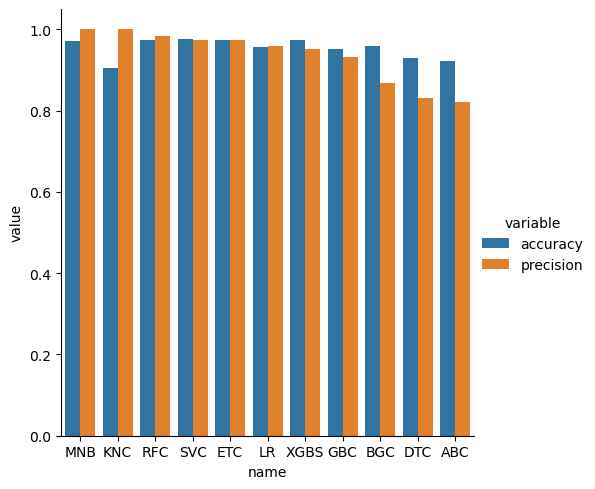

In [82]:
sns.catplot(data=model_performances_df1,x='name',y='value',hue='variable',kind='bar')

In [84]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

In [83]:
vc = VotingClassifier(estimators=[('rfc',rfc),('mnb',mnb),('etc',etc)],voting='soft')
vc.fit(X_train,y_train)

NameError: name 'VotingClassifier' is not defined

In [96]:
vc_pred = vc.predict(X_test)
print(accuracy_score(y_test,vc_pred))
print(precision_score(y_test,vc_pred))

0.971953578336557
1.0


In [97]:
stkc = StackingClassifier(estimators=[('svc',svc),('mnb',mnb),('etc',etc)],final_estimator=rfc)
stkc.fit(X_train,y_train)

StackingClassifier(estimators=[('svc', SVC(gamma=1.0, kernel='sigmoid')),
                               ('mnb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier(n_estimators=50,
                                                          random_state=2))

In [98]:
stkc_pred = stkc.predict(X_test)
print(accuracy_score(y_test,stkc_pred))
print(precision_score(y_test,stkc_pred))

0.9816247582205029
0.9541984732824428


In [85]:
import joblib

In [86]:
joblib.dump(tfidf,"vectorizer.pkl")

['vectorizer.pkl']

In [87]:
joblib.dump(mnb,"model.pkl")

['model.pkl']